In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
def drawNetworkDiagram(data):
    G = nx.DiGraph()

    for row in data:
        G.add_edge(row[1], row[2], weight=row[3], label=row[0])

    pos = nx.spring_layout(G)
    edgeLabels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=2000, node_color="skyblue", font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edgeLabels)

    plt.show()

In [8]:
def findCriticalPath(data):
    G = nx.DiGraph()

    for row in data:
        G.add_edge(row[1], row[2], weight=int(row[3]))

    criticalPath = nx.algorithms.dag.dag_longest_path(G, weight='weight')

    return criticalPath

In [12]:
def saveResultToFile(criticalPath):
    with open('./data/CMP.txt', 'w') as file:
        file.write("Critical Path: " + ' -> '.join(criticalPath))

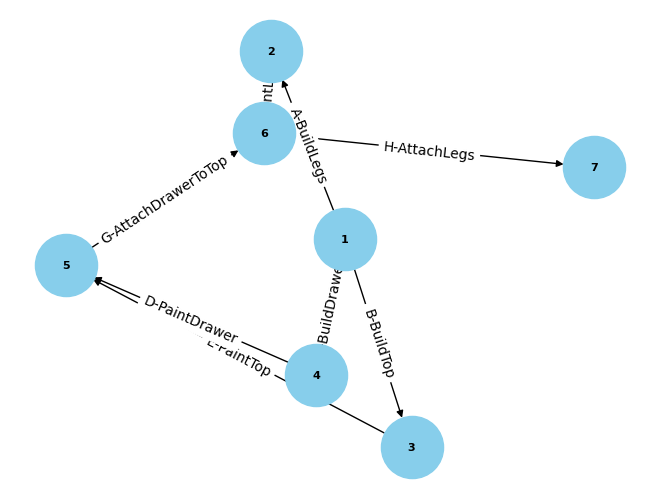

Critical Path: 1 -> 4 -> 5 -> 6 -> 7


In [13]:
def main():
    with open('./data/table1.txt', 'r') as file:
        data = [line.strip().split() for line in file]

    drawNetworkDiagram(data)
    criticalPath = findCriticalPath(data)

    print("Critical Path:", ' -> '.join(criticalPath))
    saveResultToFile(criticalPath)

if __name__ == "__main__":
    main()
